In [1]:
from os import listdir
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
indir = "/scratch3/eirikgr/openData_13TeV/MC/SM_Backgrounds"
# The output file name tag to store the skim options used abvove
datatype = indir.split("/")[-1]
# In cases there is a trailing / at the end
if not datatype: datatype = indir.split("/")[-2]
print("INFO \t Data type is {:s}".format(datatype))
skimtag = "2L_pt25_25_met50"

rBackgroundEvents = 0.5
rSignalEvents = 0.5

INFO 	 Data type is SM_Backgrounds


In [3]:
root_files = [f for f in listdir(indir) if (f.endswith('.h5') and f.startswith(datatype+"_"+skimtag))]
print("Will load the following {:d} files:\n{:s}".format(len(root_files),"\n".join(sorted(root_files))))

Will load the following 10 files:
SM_Backgrounds_2L_pt25_25_met50_num_1.h5
SM_Backgrounds_2L_pt25_25_met50_num_10.h5
SM_Backgrounds_2L_pt25_25_met50_num_2.h5
SM_Backgrounds_2L_pt25_25_met50_num_3.h5
SM_Backgrounds_2L_pt25_25_met50_num_4.h5
SM_Backgrounds_2L_pt25_25_met50_num_5.h5
SM_Backgrounds_2L_pt25_25_met50_num_6.h5
SM_Backgrounds_2L_pt25_25_met50_num_7.h5
SM_Backgrounds_2L_pt25_25_met50_num_8.h5
SM_Backgrounds_2L_pt25_25_met50_num_9.h5


In [4]:
nfile = 0
nx = 0
# Read all the root files with a given skim
for f in root_files:
    print("INFO  \t Opening file {:d}/{:d}: {:s}".format(nfile+1,len(root_files),f))
    df = pd.read_hdf(indir+"/"+f, 'mini')
    # Find the unique DSIDs in the file
    dsid = np.unique(df.iloc[:,[1]].as_matrix())
    # Loop over each DSID and put random selections into training and testing sample 
    for ids in dsid:
        print("Doing DSID {:d}. In this file: {:d} new DSIDs".format(nx+1,len(dsid)))
        newdf = df.loc[df['channelNumber'] == ids]
        # If X_test/train exists: concatenate, 
        # If not (i.e. we just wrote to a file): start new ones
        try:
            midl = newdf.sample(frac=rBackgroundEvents)
            X_train = pd.concat([X_train,midl],axis=0)
            X_test  = pd.concat([X_test, newdf.drop(midl.index.values)],axis=0)
            del [midl]
        except:
            X_train = newdf.sample(frac=rBackgroundEvents)
            X_test  = newdf.drop(X_train.index.values)
        del [newdf]
        nx += 1
        # Dump testing/training samples to file every now and then (here: every tenth DSID)
        if nx%10 == 0:
            path = indir+"/testing_bkg_%s_%i.h5"%(skimtag,nfile)
            print("Writing to file {:s}".format(path))
            X_test.to_hdf(path,key='result', mode='w')
            path = indir+"/training_bkg_%s_%i.h5"%(skimtag,nfile)
            print("Writing to file {:s}".format(path))
            X_train.to_hdf(path,key='result', mode='w')
            del [X_test]
            del [X_train]
    nfile += 1
    #if nfile > 2: break
    del [df]
    
# Needed in case we left without writing the last DSIDs to file
if nx%10 != 0:
    path = indir+"/testing_bkg_%s_%i.h5"%(skimtag,nfile)
    print("Writing to file {:s}".format(path))
    X_test.to_hdf(path,key='result', mode='w')
    path = indir+"/training_bkg_%s_%i.h5"%(skimtag,nfile)
    print("Writing to file {:s}".format(path))
    X_train.to_hdf(path,key='result', mode='w')
    del [X_test]
    del [X_train]

INFO  	 Opening file 1/10: SM_Backgrounds_2L_pt25_25_met50_num_2.h5


/mn/felt/u1/eirikgr/anaconda2/envs/norootenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Doing DSID 1. In this file: 7 new DSIDs
Doing DSID 2. In this file: 7 new DSIDs
Doing DSID 3. In this file: 7 new DSIDs
Doing DSID 4. In this file: 7 new DSIDs
Doing DSID 5. In this file: 7 new DSIDs
Doing DSID 6. In this file: 7 new DSIDs
Doing DSID 7. In this file: 7 new DSIDs
INFO  	 Opening file 2/10: SM_Backgrounds_2L_pt25_25_met50_num_5.h5
Doing DSID 8. In this file: 4 new DSIDs
Doing DSID 9. In this file: 4 new DSIDs
Doing DSID 10. In this file: 4 new DSIDs
Writing to file /scratch3/eirikgr/openData_13TeV/MC/SM_Backgrounds/testing_bkg_2L_pt25_25_met50_1.h5


/mn/felt/u1/eirikgr/anaconda2/envs/norootenv/lib/python3.7/site-packages/pandas/core/generic.py:2531: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->['lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID', 'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased', 'lep_pt_syst', 'MCType']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


Writing to file /scratch3/eirikgr/openData_13TeV/MC/SM_Backgrounds/training_bkg_2L_pt25_25_met50_1.h5
Doing DSID 11. In this file: 4 new DSIDs
INFO  	 Opening file 3/10: SM_Backgrounds_2L_pt25_25_met50_num_4.h5
Doing DSID 12. In this file: 19 new DSIDs
Doing DSID 13. In this file: 19 new DSIDs
Doing DSID 14. In this file: 19 new DSIDs
Doing DSID 15. In this file: 19 new DSIDs
Doing DSID 16. In this file: 19 new DSIDs
Doing DSID 17. In this file: 19 new DSIDs
Doing DSID 18. In this file: 19 new DSIDs
Doing DSID 19. In this file: 19 new DSIDs
Doing DSID 20. In this file: 19 new DSIDs
Writing to file /scratch3/eirikgr/openData_13TeV/MC/SM_Backgrounds/testing_bkg_2L_pt25_25_met50_2.h5
Writing to file /scratch3/eirikgr/openData_13TeV/MC/SM_Backgrounds/training_bkg_2L_pt25_25_met50_2.h5
Doing DSID 21. In this file: 19 new DSIDs
Doing DSID 22. In this file: 19 new DSIDs
Doing DSID 23. In this file: 19 new DSIDs
Doing DSID 24. In this file: 19 new DSIDs
Doing DSID 25. In this file: 19 new DSID

In [5]:
training_files = [f for f in listdir(indir) if (f.endswith('.h5') and f.startswith("testing_bkg_"+skimtag))]
print("Will load the following {:d} files:\n{:s}".format(len(training_files),"\n".join(sorted(training_files))))

Will load the following 9 files:
testing_bkg_2L_pt25_25_met50_1.h5
testing_bkg_2L_pt25_25_met50_10.h5
testing_bkg_2L_pt25_25_met50_2.h5
testing_bkg_2L_pt25_25_met50_3.h5
testing_bkg_2L_pt25_25_met50_5.h5
testing_bkg_2L_pt25_25_met50_6.h5
testing_bkg_2L_pt25_25_met50_7.h5
testing_bkg_2L_pt25_25_met50_8.h5
testing_bkg_2L_pt25_25_met50_9.h5


In [6]:
nfile = 0
for f in training_files:
    print("INFO  \t Opening file {:d}/{:d}: {:s}".format(nfile+1,len(root_files),f))
    df = pd.read_hdf(indir+"/"+f, 'result')
    try:
        X_train = pd.concat([X_train,df],axis=0)
    except:
        X_train = df
    del [df]
    nfile += 1
    #break

INFO  	 Opening file 1/10: testing_bkg_2L_pt25_25_met50_1.h5
INFO  	 Opening file 1/10: testing_bkg_2L_pt25_25_met50_3.h5
INFO  	 Opening file 1/10: testing_bkg_2L_pt25_25_met50_10.h5
INFO  	 Opening file 1/10: testing_bkg_2L_pt25_25_met50_2.h5
INFO  	 Opening file 1/10: testing_bkg_2L_pt25_25_met50_8.h5
INFO  	 Opening file 1/10: testing_bkg_2L_pt25_25_met50_6.h5
INFO  	 Opening file 1/10: testing_bkg_2L_pt25_25_met50_5.h5
INFO  	 Opening file 1/10: testing_bkg_2L_pt25_25_met50_7.h5


/mn/felt/u1/eirikgr/anaconda2/envs/norootenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


INFO  	 Opening file 1/10: testing_bkg_2L_pt25_25_met50_9.h5


In [7]:
i = 0
idx = {}
for key in X_train.keys():
    idx[key] = i
    i += 1
idx

{'MCType': 0,
 'channelNumber': 1,
 'eventNumber': 2,
 'isSignal': 3,
 'jet_n': 4,
 'lep_E': 5,
 'lep_charge': 6,
 'lep_eta': 7,
 'lep_etcone20': 8,
 'lep_isTightID': 9,
 'lep_n': 10,
 'lep_phi': 11,
 'lep_pt': 12,
 'lep_pt_syst': 13,
 'lep_ptcone30': 14,
 'lep_trackd0pvunbiased': 15,
 'lep_tracksigd0pvunbiased': 16,
 'lep_type': 17,
 'lep_z0': 18,
 'met_et': 19,
 'met_et_syst': 20,
 'met_phi': 21,
 'wgt': 22}

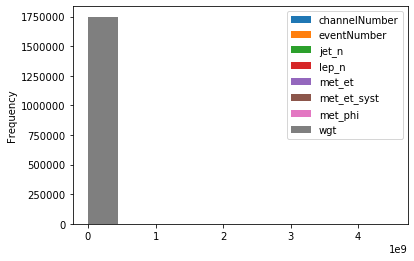

In [27]:
X_train.plot(kind='hist')

In [ ]:
pt1 = np.arange(X_train.shape[0])
for i in range(X_train.shape[0]):
    if i%100 == 0: print("Doing {:d}/{:d}".format(i,X_train.shape[0]))
    pt1[i] = X_train.values[:][i][idx['lep_pt']][0]